### Notebook 1:  Clustering con K-means
En este notebook vamos a implementar el algoritmo de clustering K-means en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

Para ello vamos a utilizar un conjunto de datos provenientes de un estudio de granos pertenecientes a distintas variedades de trigo. Los atributos de los datos provienen de una visualización de alta calidad de la estructura interna del grano utilizando una técnica de rayos X suaves. La ventaja de esta técnica es que no es destructiva y es considerablemente más económica que otras técnicas de imagen más sofisticadas como la microscopía de barrido o la tecnología láser. Las imágenes se registraron en placas KODAK de rayos X de 13x18 cm. Los estudios se llevaron a cabo utilizando grano de trigo cosechado en combinación procedente de campos experimentales, explorados en el Instituto de Agrofísica de la Academia de Ciencias de Polonia en Lublin.


Los atributos observados son seis parámetros geométricos medidos en los granos de trigo:

V1: área A

V2: perímetro P

V3: longitud de la semilla

V4: ancho de la semilla

V5: coeficiente de asimetría

V6: longitud de la ranura de la semilla

Se trata de analizar de que manera estos atributos permiten generar grupos en los datos que correspondan idealmente a cada variedad de trigo disponible en los datos.

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


      V1    V2    V3    V4    V5    V6
1  16.63 15.46 6.053 3.465 2.040 5.877
2  20.03 16.90 6.493 3.857 3.063 6.320
3  15.60 15.11 5.832 3.286 2.725 5.752
4  10.82 12.83 5.180 2.630 4.853 5.089
5  14.79 14.52 5.545 3.291 2.704 5.111
6  14.03 14.16 5.438 3.201 1.717 5.001
7  16.44 15.25 5.884 3.505 1.969 5.533
8  13.78 14.06 5.479 3.156 3.136 4.872
9  18.76 16.20 6.172 3.796 3.120 6.053
10 12.88 13.50 5.139 3.119 2.352 4.607


       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

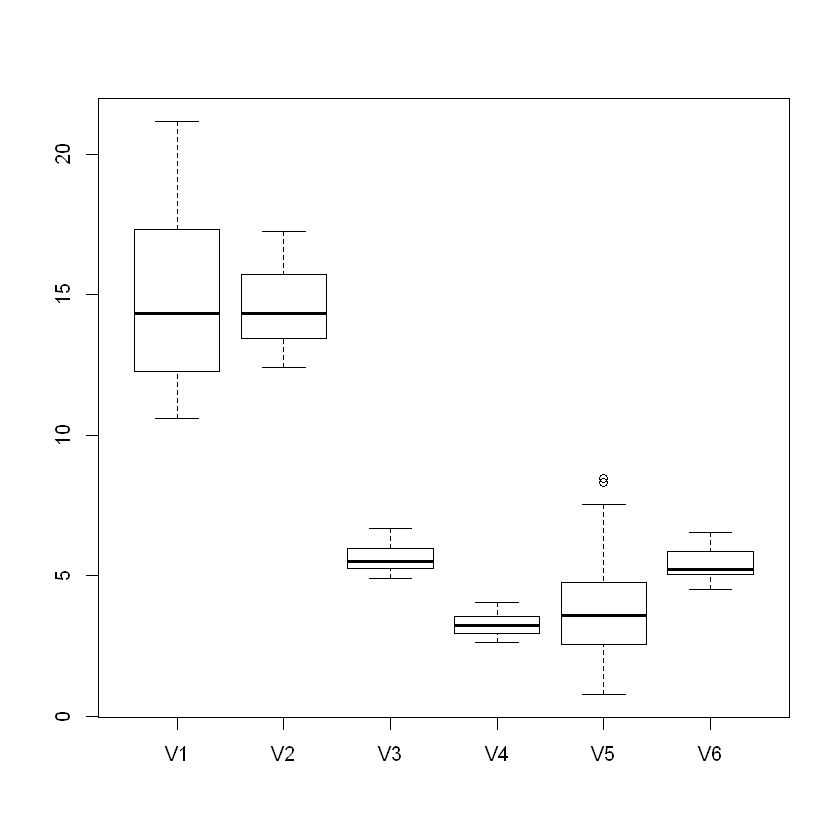

In [1]:
library(cluster)
library(ggplot2)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")

print(datos[1:10,])
summary(datos)
boxplot(datos)

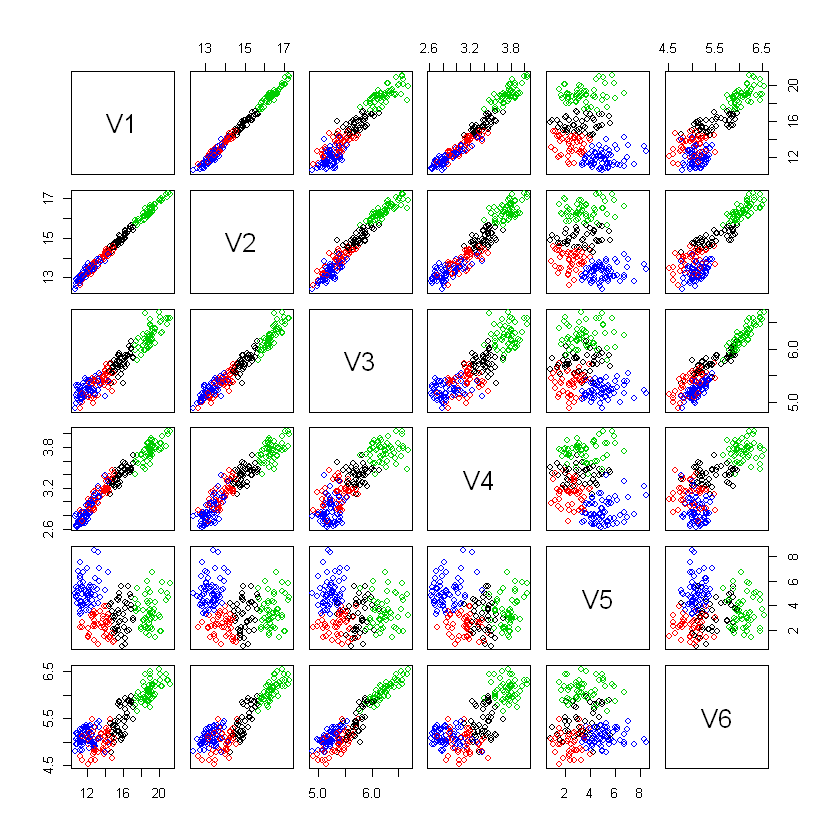

In [2]:
#ingresar valor de k0 
k0=4
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
#grafica los datos coloreados con el grupo asignado en planos de pares de variables
pairs(datos,col=cl$cluster)

Al considerar 2,3 o 4 grupos con el algoritmo KMeans, se obtienen grupos bastante bien diferenciados por las variables area, perimetro longitud de las semillas. Las tres últimas variables tienen valores con mayor nivel de confusión entre los grupos definidos por kmeans.

In [5]:
help(princomp)


Loadings:
   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
V1  0.458         0.232         0.378  0.770
V2  0.460                0.231  0.611 -0.597
V3  0.450        -0.291  0.676 -0.496       
V4  0.435         0.638 -0.343 -0.485 -0.213
V5 -0.108 -0.963  0.235                     
V6  0.419 -0.248 -0.627 -0.606              

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.167  0.167  0.167  0.167  0.167  0.167
Cumulative Var  0.167  0.333  0.500  0.667  0.833  1.000

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5     Comp.6 
2.16788117 1.00229308 0.49446476 0.20713724 0.08426551 0.03461094 

 6  variables and  210 observations.


ERROR: Error in predict.princomp(res, cl$centers): objeto 'cl' no encontrado


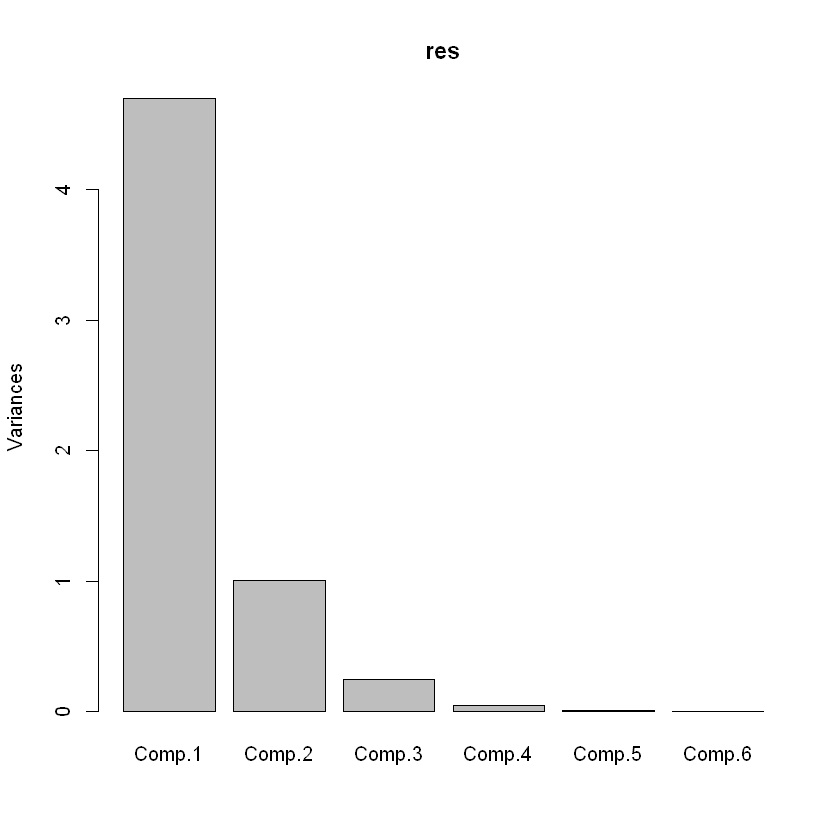

In [2]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res$loadings
print(res)
plot(res)
res2 <- predict(res,cl$centers)
res2
cl
biplot(res,xlabs=cl$cluster)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:k0,pch=19)


La representación de los grupos en el primer plano principal nos permite distinguir que el grupo 2 representa a las semillas con mayores valores de todas las variables excepto V5, el coeficiente de simetría. El grupo 1 representa las semillas con valores intermendios de las distintas variables  y los grupos 3 y 4 con los menores valores. Se distinguen el grupo 3 del 4 por sus mayores valores de V5 el coeficiente de simetría. 


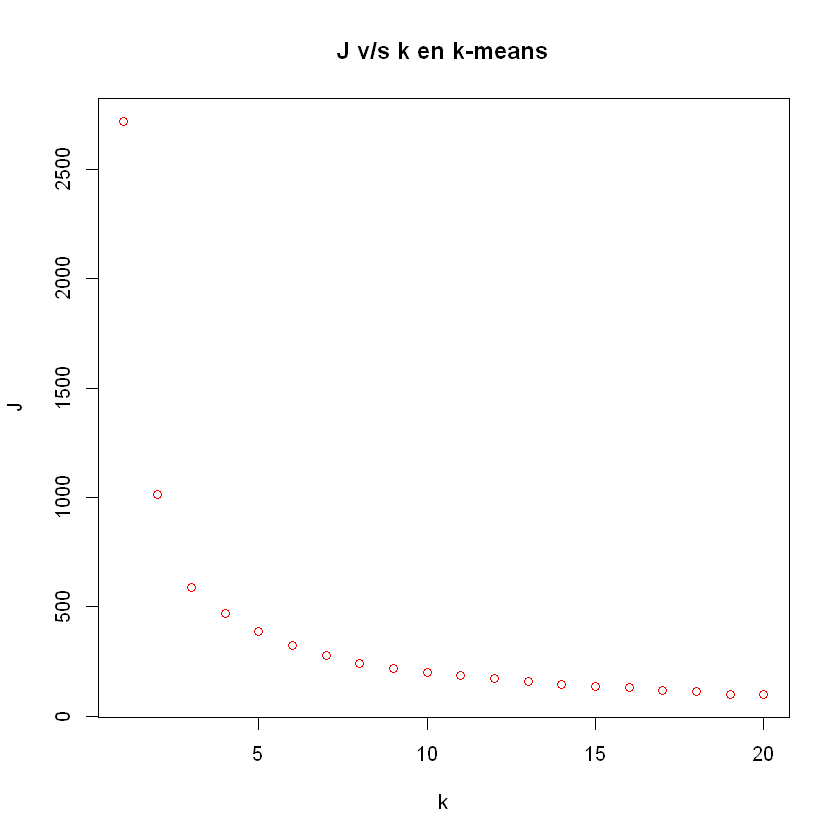

In [3]:
#Estrategia para elegir K, el numero de grupos
#J suma cuadrado de las distancias por cada k utilizado
#K-means
J<-rep(0,20)
fin_iter<-20


for (k in 1:fin_iter){
     cl<-kmeans(datos,k,iter.max=1000,nstart=10)
	 J[k]<-cl$tot.withinss
}


plot(1:fin_iter,J,xlab="k",ylab="J",type="p",main="J v/s k en k-means",col=2) 

### Ejercicio 1:

1. De acuerdo al gráfico obtenido, cuál es el valor de K mas apropiado? Explique su decisión.
2. Realice nuevamente los cálculos con el K óptimo y  caracterice los grupos obtenidos. Interprete sus resultados

## Otras alternativas de cálculo

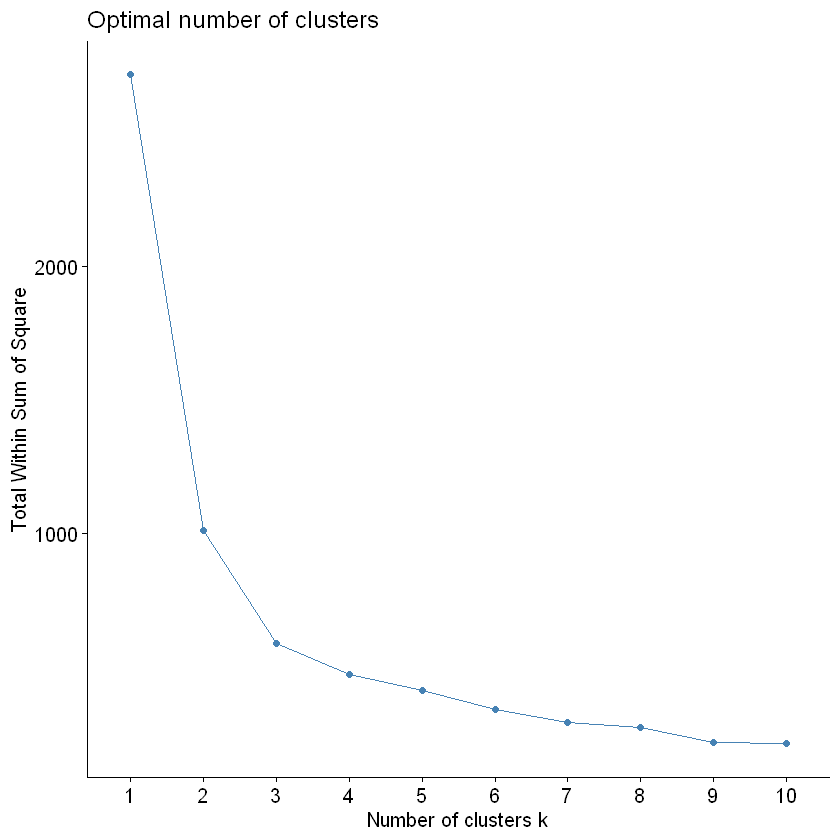

In [10]:
library(cluster)
library(factoextra)
df <- data.frame(datos)
fviz_nbclust(df, kmeans, method = "wss")


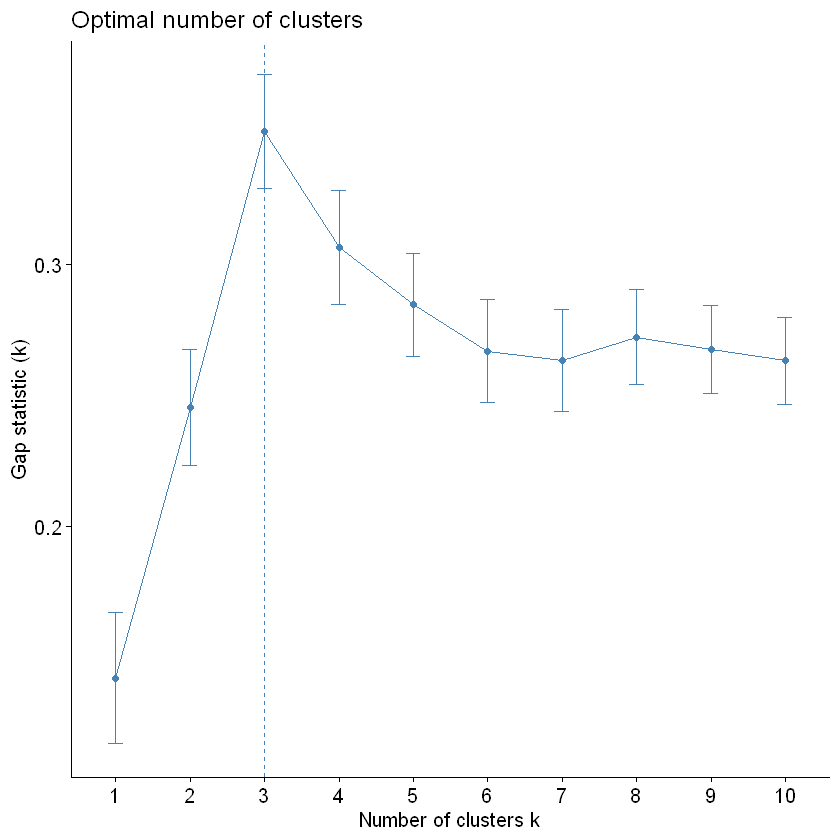

In [11]:
#calculo de gap estadístico basado en el número de grupos: 
#tasa entre la suma de distancias intragrupos con k grupos y con un sólo un grupo
gap_stat <- clusGap(df,
                    FUN = kmeans,
                    nstart = 25,
                    K.max = 10,
                    B = 50)


fviz_gap_stat(gap_stat)

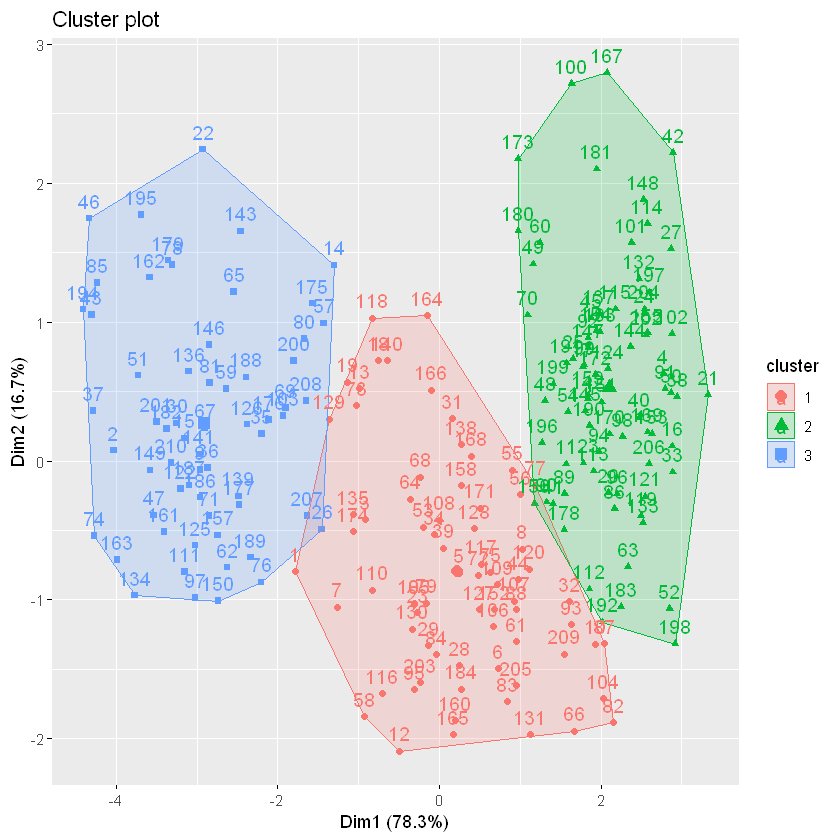

In [12]:
k0=3
cl<-kmeans(datos,k0,iter.max=1000,nstart=10)
fviz_cluster(cl, df)

### Ejercicio 2:
Realice un análisis de clustering con las 11 características (correspondiente a las columnas 4 a la 14)  en el archivo tiposMusica.csv. Si es necesario, filtre sus datos considerando las conclusiones del análisis exploratorio de la tarea de PCA.

1. Describa los datos y discuta la pertinencia de realizar un análisis de clustering o agrupamiento
2. Utilice k-means para realizar el clustering de los datos y calcule el K óptimo. 
3. Caracterice los grupos obtenidos con el K óptimo. Interprete sus resultados


In [1]:
datosC <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

In [3]:
datosC[1:10,4:14]

popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
14,0.942,0.350,79333,0.0761,0.00e+00,0.1560,-22.003,0.0352,140.044,0.0293
13,0.991,0.236,261000,0.0753,3.15e-03,0.0858,-23.232,0.0426,122.973,0.3000
2,0.994,0.240,48000,0.2510,9.58e-01,0.1020,-11.310,0.0394,99.234,0.1600
32,0.996,0.387,136293,0.0222,9.22e-01,0.1200,-29.504,0.1400,112.360,0.0687
29,0.994,0.358,154147,0.2050,1.45e-05,0.1490,-13.588,0.0430,87.696,0.5180
25,0.993,0.470,70987,0.2040,9.15e-01,0.1180,-21.667,0.0653,138.257,0.0398
0,0.644,0.415,64760,0.0197,0.00e+00,0.1970,-34.225,0.0369,74.338,0.2280
0,0.993,0.380,297372,0.0414,9.23e-01,0.1130,-22.443,0.0350,75.241,0.5470
23,0.993,0.332,219947,0.2300,8.72e-01,0.1110,-23.125,0.0620,99.962,0.0356
17,0.982,0.173,86401,0.1020,3.49e-02,0.1460,-24.937,0.0387,86.998,0.3350
